In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import pystan
import matplotlib.pyplot as plt

In [2]:
#   int<lower=1> N;              //number of units in fitting data
#   int<lower=1> M;              //number of units in predict data
#   int<lower=1> D;               // data dimension
#   vector[D] x[N];                // data
#   matrix[M, D] x_tilde;          // prediction data
#   vector[N] y;                  // observed function values
lb = 0.5
ub = 2.5
def fn(x):
#    y = np.sin(10 * np.pi * x) / (2 * x) + np.power(x - 1, 4.0)
    y = 2 * np.sin(x) - np.cos(5 * x)
    return y

N = 50
M = 10
x = np.random.uniform(low=lb, high=ub, size=N)
x.sort()
y = fn(x) + 0.001 * np.random.randn(N)
x_tilde = np.random.uniform(low=lb, high=ub, size=M)
x_tilde.sort()
dat = {"N": N, "M": M, "D": 1,
       "x": x.reshape((N, 1)),
       "x_tilde": x_tilde.reshape((M, 1)), 
       "y": y}

In [3]:
paramlist = ["y_tilde", "rho", "sigma", "alpha"]
fit = pystan.stan(file = "full_bayes_opt/gp_anisotropic_gp.stan",
                  data=dat, iter=500, pars=paramlist)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_527b9850c4cde57fd289672197a862b3 NOW.
/Users/delkind/Desktop/full_bayes_opt/jpy/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [4]:
print(fit)

Inference for Stan model: anon_model_527b9850c4cde57fd289672197a862b3.
4 chains, each with iter=500; warmup=250; thin=1; 
post-warmup draws per chain=250, total post-warmup draws=1000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
y_tilde[0]   3.82  3.0e-5 9.5e-4   3.82   3.82   3.82   3.82   3.82   1000    nan
y_tilde[1]   3.48  3.1e-5 9.8e-4   3.48   3.48   3.48   3.48   3.48   1000    nan
y_tilde[2]   2.75  3.1e-5 9.5e-4   2.75   2.75   2.75   2.75   2.75    964    nan
y_tilde[3]   2.67  3.1e-5 9.9e-4   2.67   2.67   2.67   2.67   2.67   1000    nan
y_tilde[4]   2.58  3.2e-5 9.9e-4   2.58   2.58   2.58   2.58   2.58    962    nan
y_tilde[5]   2.59  3.2e-510.0e-4   2.59   2.59   2.59   2.59   2.59    985    nan
y_tilde[6]   4.57  3.2e-5 9.7e-4   4.56   4.56   4.57   4.57   4.57    914    nan
y_tilde[7]   4.45  3.1e-5 9.6e-4   4.45   4.45   4.45   4.45   4.45    949    nan
y_tilde[8]   4.03  3.5e-5 1.0e-3   4.03   4.03   4.03   4.03   4.04    883  

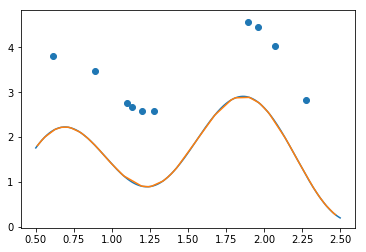

In [5]:
x_tru = np.linspace(lb, ub, 500)
y_tru = fn(x_tru)

y_pred = fit.extract("y_tilde")["y_tilde"].mean(axis=0)

plt.plot(x_tru, y_tru)
plt.plot(x, y)
plt.scatter(x_tilde, y_pred)